In [2]:
import postprocess
import plot
import QuasinormalMode
import spheroidal

from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

2023-08-27 08:34:16.340737: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-27 08:34:16.619951: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-27 08:34:16.632899: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
from importlib import reload

In [4]:
reload(postprocess)
reload(plot)
reload(QuasinormalMode)
reload(spheroidal)
from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [28]:
CCEnum = "0001"
l = 3
m = 2

h_CCE, Mf_CCE, af_CCE, Level_CCE, retro_CCE = get_waveform_CCE(CCEnum, l, m)

In [29]:
t0_arr_CCE = np.linspace(0, 50, num = 501)
qnm_fixed_list_CCE = long_str_to_qnms("", Mf_CCE, af_CCE)

run_string_prefix_CCE = f"CCE{CCEnum}_lm_{l}.{m}"
N_fix_CCE = len(qnm_fixed_list_CCE)
N_free_CCE = 10

fitter_CCE = QNMFitVaryingStartingTime(
                            h_CCE, t0_arr_CCE, N_free = N_free_CCE,
                            qnm_fixed_list = qnm_fixed_list_CCE, load_pickle = True,
                            run_string_prefix = run_string_prefix_CCE, random_initial = True,
                            initial_num = 10)

In [30]:
fitter_CCE.do_fits()

reloaded fit CCE0001_lm_3.2_N_10_t0_0.0000_50.0000_501 from an old run.


Text(0.08, 0.95, '$N_f = 10$')

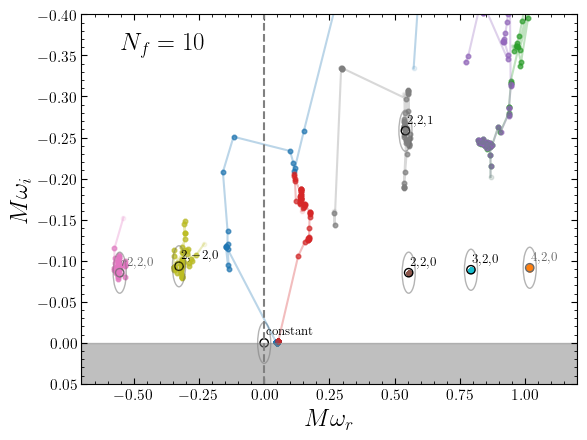

In [31]:
fig, ax = plt.subplots()

result = fitter_CCE.result_full
plot_omega_free(result, scatter_size = 10, ax = ax, scatter_alpha = 0.1,
                color_indicate = False)
ax.set_xlim(-0.7, 1.2)
ax.set_ylim(0.05, -0.4)
# all_modes = long_str_to_qnms("2.2.0_3.2.0_3.3.0_2.1.0_2.2.1_2.2.2_2.-2.0_constant_"
#                                 "4.4.0_2.0.0", Mf, af)
all_modes = long_str_to_qnms("2.2.0_2.2.1_3.2.0_4.2.0_constant_2.-2.0", Mf_CCE, af_CCE)
all_modes_retro = long_str_to_qnms("2.2.0", Mf_CCE, af_CCE)

# present_modes = ['2.2.1', '3.3.0', '3.2.0', '2.-2.0', 'constant', '2.1.0', '4.4.0', '2.2.0']
present_modes = ['2.2.1', '2.-2.0', '2.2.0', '3.2.0', 'constant']
# present_modes_retro = ['2.2.0']
plot_predicted_qnms(ax, 
                    all_modes,
                    all_modes_retro,
                    ellipse_qnm_list=all_modes,
                    edgecolor = 'dimgray',
                    ellipse_facecolor='none',
                    ellipse_edgecolor='dimgray',
                    change_lim=False,
                    label_offset=(0,0),
                    present_modes = present_modes,
                #     present_modes_retro = present_modes_retro,
                    expand_points = (1.1, 1.9)
                    )

# ax.text(0.05, 0.95, f"$N_f = 10$", 
#         transform=ax.transAxes, 
#         fontsize=18, 
#         verticalalignment='top')

ax.text(0.08, 0.95, f"$N_f = {N_free_CCE}$", 
        transform=ax.transAxes, 
        fontsize=18, 
        verticalalignment='top')

# plt.savefig(os.path.join(PLOT_PATH, f"SXS0305_lm_22_agnostic_Nf_10.pdf"), 
#             bbox_inches = 'tight')
# plt.savefig(os.path.join(PLOT_PATH, f"SXS0305_lm_44_agnostic_Nf_10.pdf"), 
            # bbox_inches = 'tight')

In [32]:
SXSnum = "0389"

h_SXS, Mf_SXS, af_SXS, Level_SXS, retro_SXS = get_waveform_SXS(SXSnum, l, m)

Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0389v5/Lev3/metadata.json


In [33]:
t0_arr_SXS = np.linspace(0, 50, num = 501)
qnm_fixed_list_SXS = long_str_to_qnms("", Mf_SXS, af_SXS)

run_string_prefix_SXS = f"SXS{SXSnum}_lm_{l}.{m}"
N_fix_SXS = len(qnm_fixed_list_SXS)
N_free_SXS = 10

fitter_SXS = QNMFitVaryingStartingTime(
                            h_SXS, t0_arr_SXS, N_free = N_free_SXS,
                            qnm_fixed_list = qnm_fixed_list_SXS, load_pickle = True,
                            run_string_prefix = run_string_prefix_SXS, random_initial = True,
                            initial_num = 10)

In [34]:
fitter_SXS.do_fits()

reloaded fit SXS0389_lm_3.2_N_10_t0_0.0000_50.0000_501 from an old run.


Text(0.08, 0.95, '$N_f = 10$')

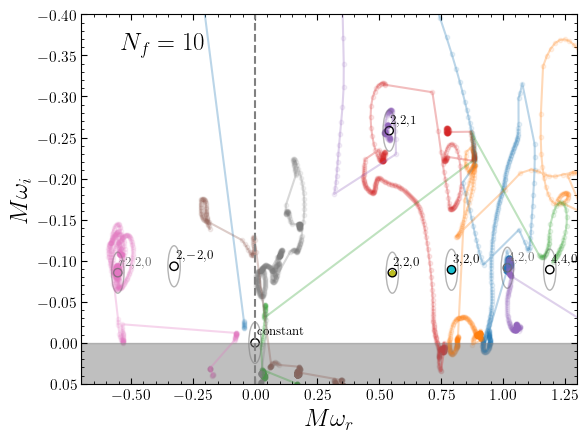

In [35]:
fig, ax = plt.subplots()

result_SXS = fitter_SXS.result_full
plot_omega_free(result_SXS, scatter_size = 10, ax = ax, scatter_alpha = 0.1,
                color_indicate = False)
ax.set_xlim(-0.7, 1.3)
ax.set_ylim(0.05, -0.4)
# all_modes = long_str_to_qnms("2.2.0_3.2.0_3.3.0_2.1.0_2.2.1_2.2.2_2.-2.0_constant_"
#                                 "4.4.0_2.0.0", Mf, af)
all_modes = long_str_to_qnms("2.2.0_2.2.1_3.2.0_4.2.0_constant_2.-2.0_4.4.0", Mf_SXS, af_SXS)
all_modes_retro = long_str_to_qnms("2.2.0", Mf_SXS, af_SXS)

# present_modes = ['2.2.1', '3.3.0', '3.2.0', '2.-2.0', 'constant', '2.1.0', '4.4.0', '2.2.0']
present_modes = ['2.2.1', '2.-2.0', '2.2.0', '3.2.0', 'constant', '4.4.0']
# present_modes_retro = ['2.2.0']
plot_predicted_qnms(ax, 
                    all_modes,
                    all_modes_retro,
                    ellipse_qnm_list=all_modes,
                    edgecolor = 'dimgray',
                    ellipse_facecolor='none',
                    ellipse_edgecolor='dimgray',
                    change_lim=False,
                    label_offset=(0,0),
                    present_modes = present_modes,
                #     present_modes_retro = present_modes_retro,
                    expand_points = (1.1, 1.9)
                    )

# ax.text(0.05, 0.95, f"$N_f = 10$", 
#         transform=ax.transAxes, 
#         fontsize=18, 
#         verticalalignment='top')

ax.text(0.08, 0.95, f"$N_f = {N_free_SXS}$", 
        transform=ax.transAxes, 
        fontsize=18, 
        verticalalignment='top')

# plt.savefig(os.path.join(PLOT_PATH, f"SXS0305_lm_22_agnostic_Nf_10.pdf"), 
#             bbox_inches = 'tight')
# plt.savefig(os.path.join(PLOT_PATH, f"SXS0305_lm_44_agnostic_Nf_10.pdf"), 
            # bbox_inches = 'tight')

In [18]:
t0_arr_CCE = np.linspace(0, 50, num = 501)
qnm_fixed_list_CCE = long_str_to_qnms("3.2.0_2.-2.0_2.2.1_constant_2.2.0", Mf_CCE, af_CCE)

run_string_prefix_CCE = f"CCE{CCEnum}_lm_{l}.{m}"
N_fix_CCE = len(qnm_fixed_list_CCE)
N_free_CCE = 0

fitter_CCE = QNMFitVaryingStartingTime(
                            h_CCE, t0_arr_CCE, N_free = N_free_CCE,
                            qnm_fixed_list = qnm_fixed_list_CCE, load_pickle = True,
                            run_string_prefix = run_string_prefix_CCE, random_initial = True,
                            initial_num = 10)

In [19]:
fitter_CCE.do_fits()

reloaded fit CCE0001_lm_2.2_N_0_fix_2.-2.0_2.2.0_2.2.1_3.2.0_constant_t0_0.0000_50.0000_501 from an old run.


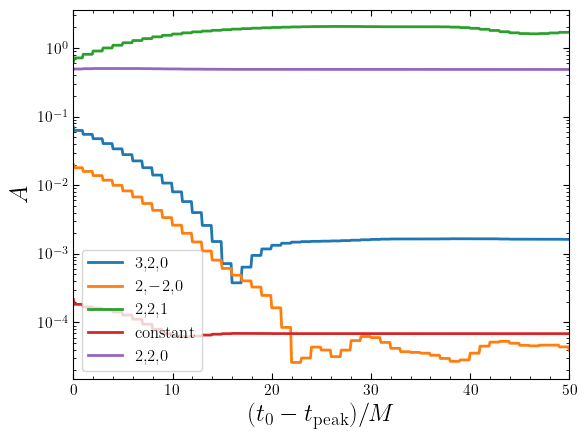

In [20]:
plot_amplitudes(fitter_CCE.result_full, fixed_modes = qnm_fixed_list_CCE)

In [21]:
t0_arr_SXS = np.linspace(0, 50, num = 501)
qnm_fixed_list_SXS = long_str_to_qnms("3.2.0_4.4.0_2.-2.0_2.2.1_constant_2.2.0", Mf_SXS, af_SXS)

run_string_prefix_SXS = f"SXS{SXSnum}_lm_{l}.{m}"
N_fix_SXS = len(qnm_fixed_list_SXS)
N_free_SXS = 0

fitter_SXS = QNMFitVaryingStartingTime(
                            h_SXS, t0_arr_SXS, N_free = N_free_SXS,
                            qnm_fixed_list = qnm_fixed_list_SXS, load_pickle = True,
                            run_string_prefix = run_string_prefix_SXS, random_initial = True,
                            initial_num = 10)

In [24]:
fitter_SXS.do_fits()
results_SXS = fitter_SXS.result_full

reloaded fit SXS0389_lm_2.2_N_0_fix_2.-2.0_2.2.0_2.2.1_3.2.0_4.4.0_constant_t0_0.0000_50.0000_501 from an old run.


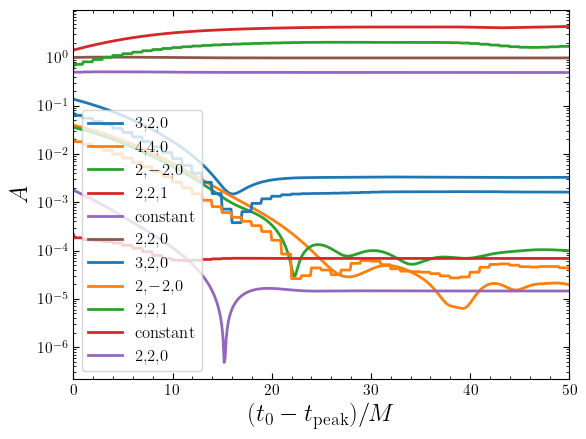

In [27]:
fig, ax = plt.subplots()
plot_amplitudes(results_SXS, fixed_modes = qnm_fixed_list_SXS, ax = ax)
plot_amplitudes(fitter_CCE.result_full, fixed_modes = qnm_fixed_list_CCE, ax = ax)

In [ ]:
# CCE_settings_dict = {
#     "0001": {
#         "SXSnum": "0389",
#         (2,2): 
#     }
# }